In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

from blg_strain.bands import get_bands
from blg_strain.berry import berry_mu
from blg_strain.utils.utils import get_splines
from blg_strain.utils.utils import densify
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import D_valley, ntot_func, D_func, n_valley

In [2]:
%matplotlib notebook

In [3]:
Delta = 0.01
delta = 0.01

kx, ky, Kx, Ky, E, Psi = get_bands(Delta=Delta, delta=delta)
Omega, Mu = berry_mu(Kx, Ky, E, Psi)

kx2, ky2, Kx2, Ky2, E2, Psi2 = get_bands(Delta=Delta, delta=delta, twobytwo=True)
Omega2, Mu2 = berry_mu(Kx2, Ky2, E2, Psi2)

<IPython.core.display.Javascript object>


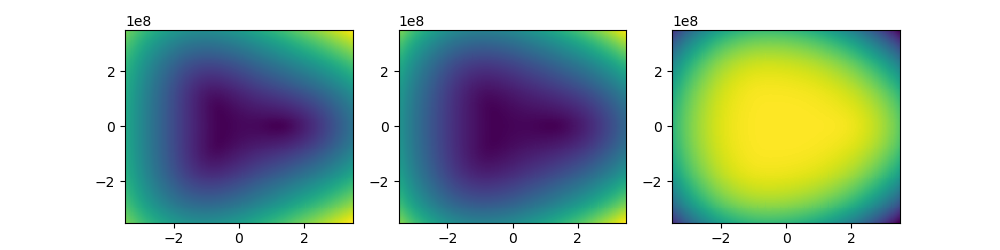

In [4]:
fig, ax = plt.subplots(ncols=3, figsize=(10,2.5))
ax[0].pcolormesh(Kx, Ky, E[2])
ax[1].pcolormesh(Kx, Ky, E2[1])
ax[2].pcolormesh(Kx, Ky, E[2]- E2[1])

In [5]:
from blg_strain.utils.const import eta0, a, nu, gamma1

<IPython.core.display.Javascript object>


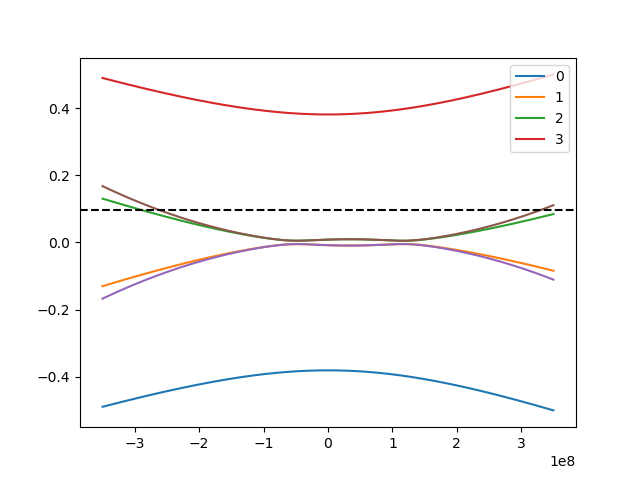

In [17]:
j = 100
fig, ax = plt.subplots()

kshift = eta0 / a * (1+nu) * delta / 2

for n in range(4):
    ax.plot(Kx[:, j], E[n][:,j], label=n)
for n in range(2):
    ax.plot(Kx[:, j], E2[n][:,j])

ax.axhline(gamma1/4, ls='--', color='k')
    
plt.legend()

# Try Berry curvature dipole

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

from blg_strain.bands import get_bands
from blg_strain.berry import berry_mu
from blg_strain.utils.utils import get_splines
from blg_strain.utils.utils import densify
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import D_valley, ntot_func, D_func, n_valley

In [2]:
from blg_strain.utils.const import hbar, v3
kL = 0.035e9  # m^-1
EL = hbar * kL * v3 / 2

In [3]:
from blg_strain.utils.params import w
w(1, 3, 1, 0).real / EL  # Value of w3 (in EL) for 100% strain

468.7199049518566

In [4]:
wEL = 5
delta = wEL / (w(1,3,1,0).real / EL)  # delta corresponding to value of wEL
delta

0.010667351540177417

In [5]:
wELs = np.array([1,3,5])
deltas = wELs/ (w(1,3,1,0).real / EL)

# 2x2

In [6]:
Delta = 0.01
EFs = np.linspace(0, 0.013, 21)


Ds = []
ntots = []

for delta in deltas:

    # K
    kx, ky, Kx, Ky, E, Psi = get_bands(Delta=Delta, delta=delta, twobytwo=True)
    Omega, Mu = berry_mu(Kx, Ky, E, Psi)
    splE, splO, splM = get_splines(kx, ky, E, Omega, Mu)
    kx2, ky2, E2, Omega2, Mu2 = densify(kx, ky, splE, splO, splM)
    
    ntot = np.empty_like(EFs)
    D = np.empty_like(EFs)

    T=0
    for i, EF in enumerate(EFs):
        f = feq_func(E2, EF, T=T)
        ntot[i] = n_valley(kx2, ky2, f, EF, T=T)
        D[i] = D_valley(kx2, ky2, f, splO)[1]
    
    Ds.append(D)
    ntots.append(ntot)

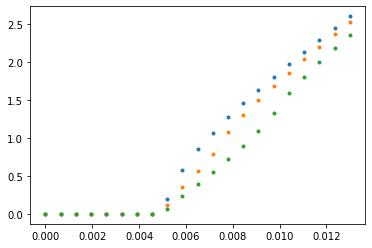

In [7]:
fig, ax = plt.subplots()
for ntot in ntots:
    ax.plot(EFs, ntot / kL**2, '.')

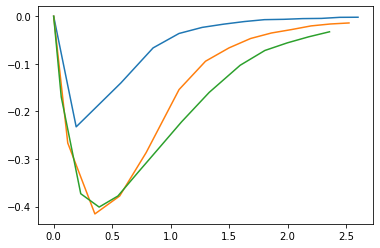

In [8]:
fig, ax = plt.subplots()

for ntot, D in zip(ntots, Ds):
    ax.plot(ntot / kL ** 2, D * kL)

# 4x4

In [9]:
Delta = 0.01
EFs = np.linspace(0, 0.013, 21)


D44s = []
ntot44s = []

for delta in deltas:

    # K
    kx, ky, Kx, Ky, E, Psi = get_bands(Delta=Delta, delta=delta, twobytwo=False)
    Omega, Mu = berry_mu(Kx, Ky, E, Psi)
    splE, splO, splM = get_splines(kx, ky, E, Omega, Mu)
    kx2, ky2, E2, Omega2, Mu2 = densify(kx, ky, splE, splO, splM)
    
    ntot44 = np.empty_like(EFs)
    D44 = np.empty_like(EFs)

    T=0
    for i, EF in enumerate(EFs):
        f = feq_func(E2, EF, T=T)
        ntot44[i] = n_valley(kx2, ky2, f, EF, T=T)
        D44[i] = D_valley(kx2, ky2, f, splO)[2]
    
    D44s.append(D44)
    ntot44s.append(ntot44)

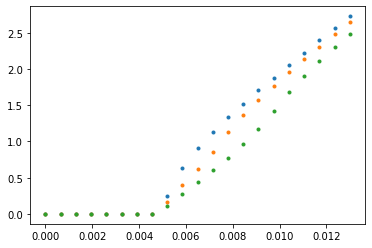

In [10]:
fig, ax = plt.subplots()
for ntot44 in ntot44s:
    ax.plot(EFs, ntot44 / kL**2, '.')

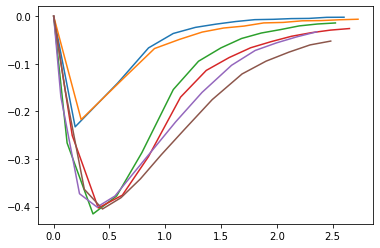

In [11]:
fig, ax = plt.subplots()

for ntot, ntot44, D, D44 in zip(ntots, ntot44s, Ds, D44s):
    ax.plot(ntot / kL ** 2, D * kL)
    ax.plot(ntot44 / kL ** 2, D44 * kL)